In [1]:
import numpy as np


In [36]:
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

In [3]:
input_size

240

In [4]:
weight_size

360

In [5]:
np.prod(input_shape)

120

In [14]:
np.prod(x.shape[1:])

120

In [9]:
w.shape


(120, 3)

In [23]:
x=x.reshape(num_inputs,np.prod(x.shape[1:]))

In [24]:
x.shape

(2, 120)

In [25]:
x.dot(w)+b

array([[ 1.49834967,  1.70660132,  1.91485297],
       [ 3.25553199,  3.5141327 ,  3.77273342]])

In [28]:
N=x.shape[0]
D=np.prod(x.shape[1:])
x=x.reshape(N,D)
out=x.dot(w)+b

In [29]:
out

array([[ 1.49834967,  1.70660132,  1.91485297],
       [ 3.25553199,  3.5141327 ,  3.77273342]])

In [32]:
np.mean(out,axis=0)

array([ 2.37694083,  2.61036701,  2.8437932 ])

In [33]:
out=np.max(0,x)

TypeError: only integer scalar arrays can be converted to a scalar index

In [37]:
x.shape

(2, 4, 5, 6)

In [38]:
np.multiply(x,(x>0))

array([[[[ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00]],

        [[ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
           -0.00000000e+00,   4.18410042e-04,   2.92887029e-03],
         [  5.43933054e-03,   7.94979079e-03,   1.04602510e-02,
            1.29707113e-02,   1

In [39]:
x>0

array([[[[False, False, False, False, False, False],
         [False, False, False, False, False, False],
         [False, False, False, False, False, False],
         [False, False, False, False, False, False],
         [False, False, False, False, False, False]],

        [[False, False, False, False, False, False],
         [False, False, False, False,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True]],

        [[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True]],

        [[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  T

In [40]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver


In [48]:
data = get_CIFAR10_data()

In [53]:
d={}
for k, v in list(data.items()):
    print(k)  
    d[k]=v

X_train
y_train
X_val
y_val
X_test
y_test


In [58]:
d['X_val'].shape

(1000, 3, 32, 32)

In [59]:
N=d['X_val'].shape[0]
D=np.prod(d['X_val'].shape[1:])
X_val=d['X_val'].reshape(N,D)

In [60]:
X_val.shape

(1000, 3072)

In [63]:
np.arange(0,2)

array([0, 1])

In [67]:
layer=4
for i in range(0,layer-1):
    print(str(i+1))
print(str(layer))

1
2
3
4


In [72]:
layer=4
print(str(layer))
for i in range(1,layer):
    print(str(layer-i))


4
3
2
1


In [74]:
s={}
s['w']=np.random.rand(5,3)
x=np.zeros_like(s['w'])
x

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [76]:
for i in range(0,layer-1):
    print(i)

0
1
2


In [77]:
dims = [5] + [20, 30] + [10]

In [84]:
for i in range(0,len(dims)-1):
    print('1:%d 2:%d' %(dims[i],dims[i+1]))

1:5 2:20
1:20 2:30
1:30 2:10


In [90]:
print(x.shape)

(5, 3)


In [91]:
# this code you can use when you need to find the right learning rate and weight initialisation reg = 0
not_reach = True
while not_reach:
    weight_scale = 10**(np.random.uniform(-6,-1))
    learning_rate = 10**(np.random.uniform(-4,-1))
    train_acc_hist = run_model(weight_scale,learning_rate)
    if max(train_acc_hist) == 1.0:
        not_reach = False
        lr = learning_rate
        ws = weight_scale

print 'Has worked with %f and %f'%(lr,ws)
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

SyntaxError: invalid syntax (<ipython-input-91-07ee2f7b0c0d>, line 12)

In [92]:
x=np.random.rand(5,3)

In [97]:
mu=np.sum(x,axis=0)/5

In [98]:
x-mu

array([[ 0.07634227,  0.20878458, -0.34144659],
       [ 0.08736349, -0.27619072,  0.22474819],
       [-0.32167836, -0.08972934,  0.1782706 ],
       [ 0.00590557, -0.24802459, -0.17008082],
       [ 0.15206702,  0.40516007,  0.10850862]])

In [99]:
x

array([[ 0.72228666,  0.69486146,  0.22594598],
       [ 0.73330788,  0.20988617,  0.79214076],
       [ 0.32426603,  0.39634755,  0.74566318],
       [ 0.65184996,  0.2380523 ,  0.39731175],
       [ 0.79801141,  0.89123696,  0.67590119]])

In [100]:
mu

array([ 0.64594439,  0.48607689,  0.56739257])

In [101]:
mu.shape

(3,)

In [103]:
x*mu


array([[ 0.46655701,  0.3377561 ,  0.12820007],
       [ 0.47367611,  0.10202082,  0.44945478],
       [ 0.20945783,  0.19265538,  0.42308375],
       [ 0.42105883,  0.11571172,  0.22543174],
       [ 0.51547099,  0.43320969,  0.38350131]])

In [104]:
mu*x

array([[ 0.46655701,  0.3377561 ,  0.12820007],
       [ 0.47367611,  0.10202082,  0.44945478],
       [ 0.20945783,  0.19265538,  0.42308375],
       [ 0.42105883,  0.11571172,  0.22543174],
       [ 0.51547099,  0.43320969,  0.38350131]])

In [105]:
bn_params = {'bn_param' + str(i + 1): {'mode': 'train',
                                                        'running_mean': np.zeros(dims[i + 1]),
                                                        'running_var': np.zeros(dims[i + 1])}
                              for i in range(len(dims) - 2)}

In [106]:
bn_params.keys()

dict_keys(['bn_param1', 'bn_param2'])

In [114]:
bn_param=bn_params.keys()
for k in bn_params:
                #print(bn_params[k].keys())
        print(bn_params[k]['mode'])

train
train


In [115]:
mu

array([ 0.64594439,  0.48607689,  0.56739257])

In [117]:
matrix=mu*x

In [122]:
U1=matrix>0.5

In [123]:
print(U1)

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True False False]]


In [124]:
matrix*U1

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.51547099,  0.        ,  0.        ]])

In [125]:
def optimizer(weight_scale,reg,lr):
    
    hidden_dims = [100, 100, 100, 100, 100]

    bn_model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=True, reg=reg, dropout=0.5)
    solver = Solver(model, data,
                      num_epochs=1000, batch_size=100,
                      update_rule='adam',
                      optim_config={
                        'learning_rate': lr,
                      },lr_decay=0.95, num_train_samples=None
                      verbose=True, print_every=500)
    solver.train()
    return solver.train_acc_history

SyntaxError: invalid syntax (<ipython-input-125-23e7c56d0eb8>, line 12)

In [126]:
from cs231n import layer_utils

In [1]:
import numpy as np


In [4]:
x=np.random.rand(3,3)

In [6]:
x=x-0.5


In [7]:
x

array([[ 0.21488477, -0.33568902, -0.16542564],
       [ 0.00379471, -0.24142615,  0.07557033],
       [ 0.26559609, -0.21808585, -0.26223636]])

In [10]:
np.multiply(x,x<=0)

array([[ 0.        , -0.33568902, -0.16542564],
       [ 0.        , -0.24142615,  0.        ],
       [ 0.        , -0.21808585, -0.26223636]])

In [11]:
np.exp(np.multiply(x,x<0))

array([[ 1.        ,  0.71484537,  0.84753289],
       [ 1.        ,  0.78550681,  1.        ],
       [ 1.        ,  0.80405641,  0.76932916]])

In [14]:
alpha=1.6733
lamda=1.0507
out=(alpha*np.exp(np.multiply(x,x<0))-alpha)*(x<0)




array([[ 0.        , -0.47714924, -0.25512322],
       [ 0.        , -0.35891145,  0.        ],
       [ 0.        , -0.32787241, -0.38598151]])

In [15]:
(lamda*x)*(x>0)

array([[ 0.22577943, -0.        , -0.        ],
       [ 0.00398711, -0.        ,  0.07940175],
       [ 0.27906181, -0.        , -0.        ]])

In [16]:
out=(alpha*np.exp(np.multiply(x,x<0))-alpha)*(x<=0)
out=out+(lamda*x)*(x>0)

In [17]:
out

array([[ 0.22577943, -0.47714924, -0.25512322],
       [ 0.00398711, -0.35891145,  0.07940175],
       [ 0.27906181, -0.32787241, -0.38598151]])

In [19]:
np.std(out)

0.2684767006145734

In [25]:
(alpha*np.exp(np.multiply(x,x<=0))-alpha)*(x<=0)

array([[ 0.        , -0.47714924, -0.25512322],
       [ 0.        , -0.35891145,  0.        ],
       [ 0.        , -0.32787241, -0.38598151]])

In [23]:
np.exp(np.multiply(x,x<=0))

array([[ 1.        ,  0.71484537,  0.84753289],
       [ 1.        ,  0.78550681,  1.        ],
       [ 1.        ,  0.80405641,  0.76932916]])

In [27]:
out=lamda*(alpha*np.exp(np.multiply(x,x<=0))-alpha)*(x<=0)

In [28]:
out=out+(lamda*x)*(x>0)

In [29]:
out

array([[ 0.22577943, -0.5013407 , -0.26805797],
       [ 0.00398711, -0.37710826,  0.07940175],
       [ 0.27906181, -0.34449554, -0.40555078]])

In [30]:
dout=np.random.rand(3,3
                   )

In [31]:
np.multiply(x,x<=0)

array([[ 0.        , -0.33568902, -0.16542564],
       [ 0.        , -0.24142615,  0.        ],
       [ 0.        , -0.21808585, -0.26223636]])

In [32]:
np.exp(np.multiply(x,x<=0))

array([[ 1.        ,  0.71484537,  0.84753289],
       [ 1.        ,  0.78550681,  1.        ],
       [ 1.        ,  0.80405641,  0.76932916]])

In [33]:
np.exp(np.multiply(x,x<=0))*dout

array([[ 0.41760824,  0.06007693,  0.0600908 ],
       [ 0.3360145 ,  0.66536416,  0.78123163],
       [ 0.50732573,  0.26767028,  0.24909054]])

In [34]:
dout

array([[ 0.41760824,  0.08404186,  0.07090085],
       [ 0.3360145 ,  0.84705079,  0.78123163],
       [ 0.50732573,  0.33289988,  0.32377629]])

In [35]:
(np.exp(np.multiply(x,x<=0))*dout)*(x<=0)

array([[ 0.        ,  0.06007693,  0.0600908 ],
       [ 0.        ,  0.66536416,  0.        ],
       [ 0.        ,  0.26767028,  0.24909054]])

In [36]:
dx=lamda*np.multiply(dout,x>0)
dx=dx+lamda*alpha*(np.exp(np.multiply(x,x<=0))*dout)*(x<=0)

In [38]:
dx

array([[ 0.43878098,  0.10562344,  0.10564781],
       [ 0.35305044,  1.16980089,  0.82084007],
       [ 0.53304715,  0.47060084,  0.43793513]])

In [39]:
lamda*np.multiply(dout,x>0)

array([[ 0.43878098,  0.        ,  0.        ],
       [ 0.35305044,  0.        ,  0.82084007],
       [ 0.53304715,  0.        ,  0.        ]])

In [40]:
lamda*alpha*(np.exp(np.multiply(x,x<=0))*dout)*(x<=0)

array([[ 0.        ,  0.10562344,  0.10564781],
       [ 0.        ,  1.16980089,  0.        ],
       [ 0.        ,  0.47060084,  0.43793513]])

In [41]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y)/ (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [42]:
data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


In [51]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: selu_forward(x)[0], x, dout)

_, cache = selu_forward(x)
dx = selu_backward(dout, cache)

# The error should be around 3e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  7.17536956874e-11


In [44]:
from cs231n import layers

In [47]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = selu_forward(x)

NameError: name 'selu_forward' is not defined

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.04545455,  0.13636364],
       [ 0.22727273,  0.31818182,  0.40909091,  0.5       ]])

In [53]:
from cs231n.layers import *
from cs231n.layer_utils import *

In [49]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = selu_forward(x)

In [50]:
out

array([[-0.69177273, -0.59028751, -0.47914399, -0.35742301],
       [-0.22411791, -0.07812624,  0.04775909,  0.14327727],
       [ 0.23879545,  0.33431364,  0.42983182,  0.52535   ]])

In [54]:
#from cs231n.layer_utils import affine_selu_forward, affine_selu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_selu_forward(x, w, b)
dx, dw, db = affine_selu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_selu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_selu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_selu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward:
dx error:  2.72801749436e-10
dw error:  6.12141808199e-10
db error:  7.06213100435e-11


In [84]:
def optimizer_results(sm,weight_scale,reg,lr):
    
    hidden_dims = [500,500,500]

    bn_model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, reg=reg, dropout=0.4,use_SeLU=True)
    solver = Solver(bn_model, sm,
                      num_epochs=100, batch_size=100,
                      update_rule='adam',
                      optim_config={
                        'learning_rate': lr,
                      } ,
                      verbose=False,print_every=1000)
    solver.train()
    return solver

In [80]:
best_model = None
num_train = 1000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
not_reach = True
while not_reach:
    weight_scale = 10**(np.random.uniform(-6,-1))
    learning_rate = 10**(np.random.uniform(-4,-1))
    #reg= 10**(np.random.uniform(-2,0))
    t = optimizer_results(small_data,weight_scale,0,learning_rate)
    print(max(train_acc_hist))
    if max(train_acc_hist) > 0.54:
        not_reach = False
        lr = learning_rate
        ws = weight_scale
        best_model= t
        

using SeLU
0.13
using SeLU


KeyboardInterrupt: 

using SeLU
0.124


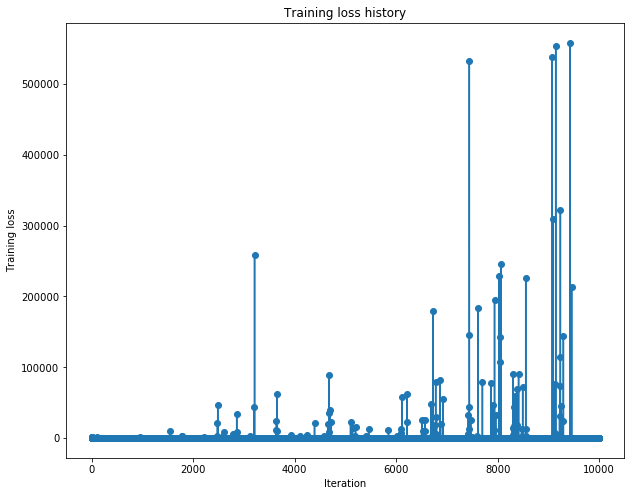

In [86]:
best_model = None
num_train = 10000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
not_reach = True
while not_reach:
    weight_scale = 10**(np.random.uniform(-6,-1))
    learning_rate = 10**(np.random.uniform(-4,-1))
    #reg= 10**(np.random.uniform(-2,0))
    t = optimizer_results(small_data,weight_scale,0,learning_rate)
    print(max(t.train_acc_history))

    lr = learning_rate
    ws = weight_scale
    best_model= t
    not_reach=False
plt.plot(t.loss_history, '-o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()    

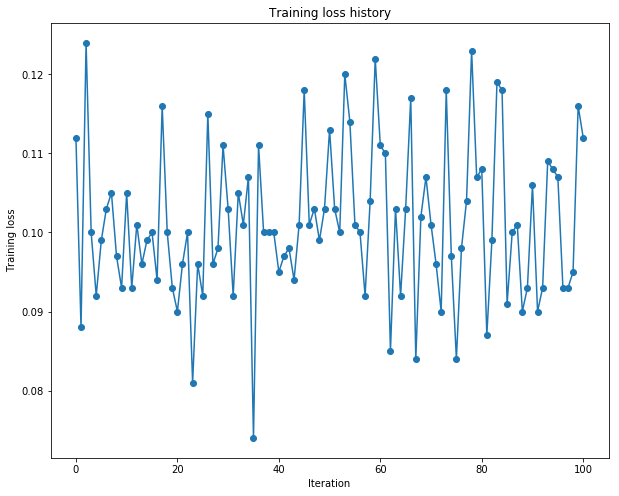

In [88]:
plt.plot(t.train_acc_history, '-o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

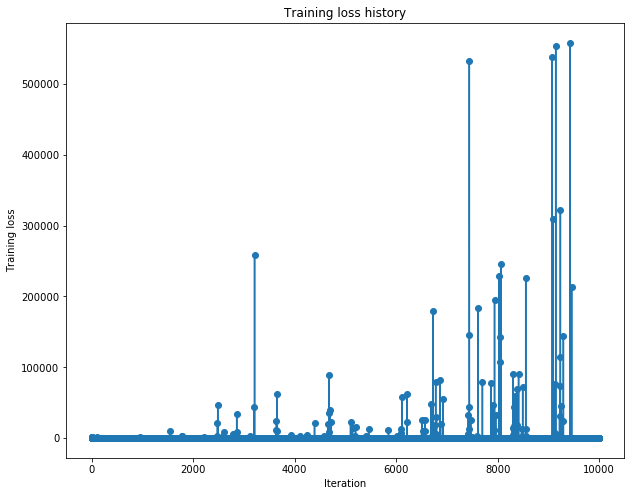

In [87]:
plt.plot(t.loss_history, '-o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [85]:
print(max(t.train_acc_hist))

AttributeError: 'Solver' object has no attribute 'train_acc_hist'